In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [19]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [20]:
data=df[['Taxable.Income','Undergrad','Marital.Status','Work.Experience','Urban']]
data

,Taxable.Income,Undergrad,Marital.Status,Work.Experience,Urban
0,68833,NO,Single,10,YES
1,33700,YES,Divorced,18,YES
2,36925,NO,Married,30,YES
3,50190,YES,Single,15,YES
4,81002,NO,Married,28,NO
...,...,...,...,...,...
595,76340,YES,Divorced,7,YES
596,69967,YES,Divorced,2,YES
597,47334,NO,Divorced,0,YES
598,98592,YES,Married,17,NO


In [21]:
data['Taxable.Income'].max()

99619

In [22]:
data['Tax_New']=pd.cut(data['Taxable.Income'],bins=[0,30000,99619+1],labels=['Risky','Good'])
data1=data.drop(['Taxable.Income'],axis=1)
data1

,Undergrad,Marital.Status,Work.Experience,Urban,Tax_New
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [23]:
data2 = pd.get_dummies(data1)
data2

,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_New_Risky,Tax_New_Good
0,10,1,0,0,0,1,0,1,0,1
1,18,0,1,1,0,0,0,1,0,1
2,30,1,0,0,1,0,0,1,0,1
3,15,0,1,0,0,1,0,1,0,1
4,28,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
595,7,0,1,1,0,0,0,1,0,1
596,2,0,1,1,0,0,0,1,0,1
597,0,1,0,1,0,0,0,1,0,1
598,17,0,1,0,1,0,1,0,0,1


In [47]:
data2['Tax_New_Risky'].value_counts()

0    476
1    124
Name: Tax_New_Risky, dtype: int64

In [27]:
data3=data2.drop(['Tax_New_Risky'],axis=1)
data3.head(3)

,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_New_Good
0,10,1,0,0,0,1,0,1,1
1,18,0,1,1,0,0,0,1,1
2,30,1,0,0,1,0,0,1,1


In [32]:
x=data3.iloc[:,0:8]
y=data3['Tax_New_Good']

In [33]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

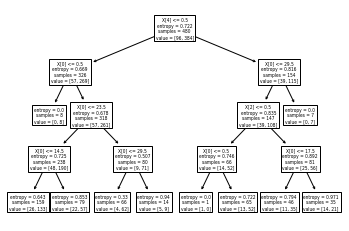

In [40]:
#PLot the decision tree
tree.plot_tree(model);



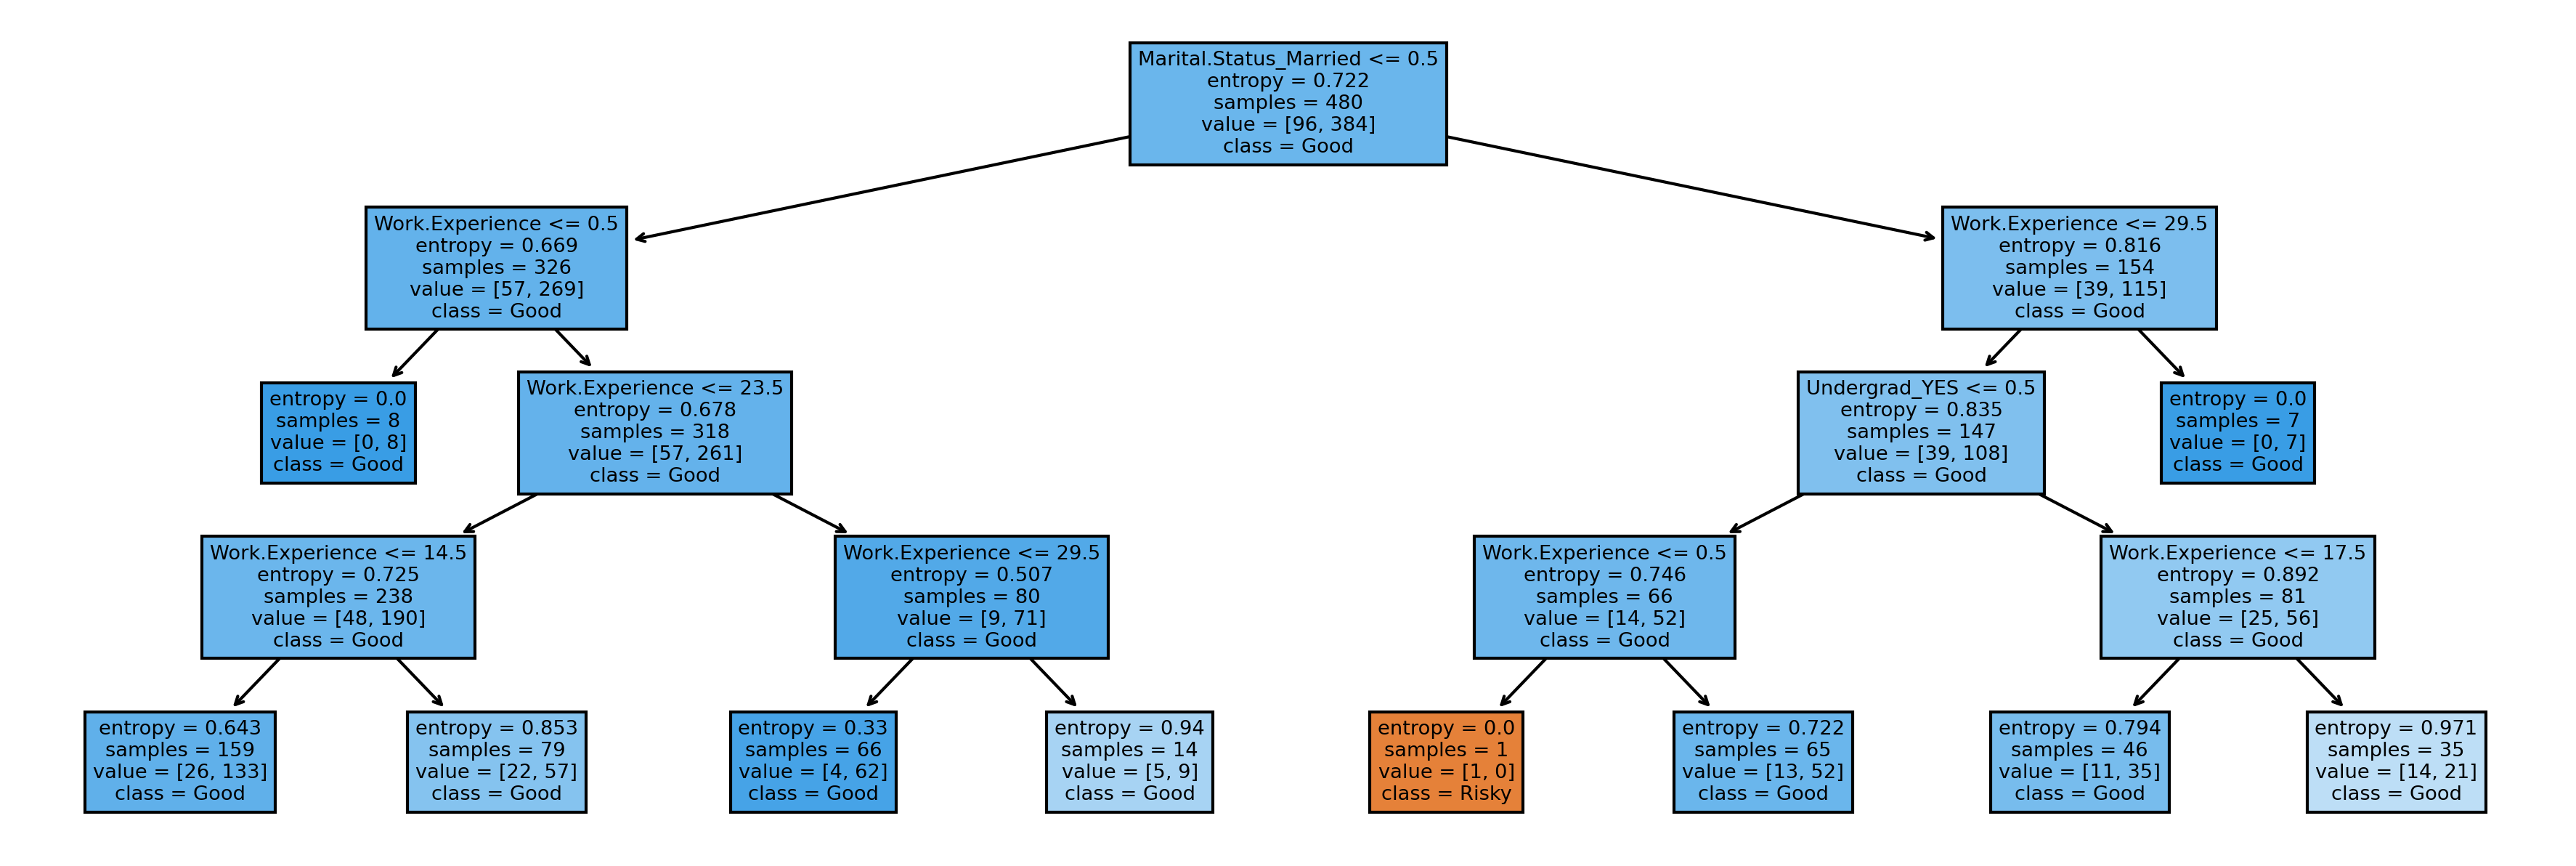

In [41]:
fn=['Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 


In [42]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    119
0      1
dtype: int64

In [43]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [44]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Tax_New_Good,,
0,0,28
1,1,91


In [45]:
# Accuracy 
np.mean(preds==y_test)

0.7583333333333333

# Building Decision Tree Classifier (CART) using Gini Criteria

In [49]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [53]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)


0.7583333333333333